# K-means clustering

For this week's assignment, you will implement a *clustering* algorithm called K-means. Up to this point, all the algorithms we've covered have been *supervised learning*, but clustering is a form of *unsupervised learning*. In unsupervised learning, there is no target variable we are trying to approximate. Instead, we are trying to extract some kind of pattern from the data, where the type of pattern depends on the algorithm we use. In the case of clustering, we are looking for *clusters* or groupings within the data.

We will work with a classic dataset from machine learning; Fisher's Iris dataset. The dataset contains the measurements of *length* and *width* of the *sepals* and *petals* of 150 flowers. 

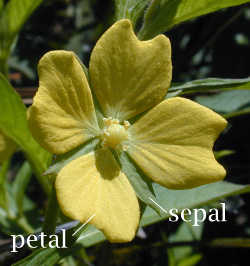

The dataset contains 4 attributes for each flower; *length* and *width* of both *sepals* and *petals*. In addition, this data set also actually contains the supervised label of the species of Iris, but we will completely **ignore that part of the data set for this assignment**. So the assignment we're trying to solve is to find out how these 4 properties are distributed for all these 150 flowers, and if we can find any groupings of points that are sufficiently similar that we might consider them to be their own species.

The Iris dataset is such a classic example that it even comes included in `seaborn`, and so can easily be loaded with the code below:

In [ ]:
%matplotlib inline

import math
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

# Load the data set
df_iris = sns.load_dataset('iris')

# Remove the target variable
df_iris = df_iris.drop('species', axis=1)

display(df_iris)

### Exploration

Let's plot this data, so we can see what it looks like. Below is some seaborn code that plots a so-called scatter matrix. This is a grid of scatter plots that can be used to easily identify correlations and see the separability of the dataset. The diagonals of this plot show how the data is distributed for every *single* feature, while the non-diagonals show scatter plots using *two* of the features as the $x$ and $y$ axis, with all the different possible configurations shown in the grid.

In [ ]:
sns.pairplot(df_iris)

plt.show()

This type of graphic is a nice way to visually explore what the data set looks like, and to determine what features might be useful. Normally, if you were to solve this clustering problem, you would probably just use all 4 features to determine the clusters. However, the goal of this assignment is to understand clustering algorithms, so having clear visuals will be essential. For this reason, we'll select 2 features to use, so we can make nice 2-dimensional plots containing all the features. From the plot above, it seems like `petal_length` and `petal_width` are the most distinctive features, so we'll use those.

**Note:** Although we will only be working with 2 features, all functions and code for this assignment should work with *any* number of features.

In [ ]:
data = df_iris.drop(['sepal_length', 'sepal_width'], axis=1).to_numpy()

print(data)

## Using Numpy effectively

For this whole assignment we'll be working with *Numpy* arrays a lot again, and using the functionalities of Numpy effectively to solve certain parts of the assignment will be key. In the previous module we mainly used matrix multiplications to perform certain calculations for entire vectors / matrices in a single operation, without the need for for-loops. For this module we won't use matrix multiplications again, but instead learn about other vector operations in Numpy.

All of the Numpy functions are made to work with Numpy [ndarrays](https://numpy.org/doc/stable/user/absolute_beginners.html#more-information-about-arrays), and are meant to be applied to whole vectors or matrices at once. This does **not** mean your code shouldn't have for-loops at all, but certain steps or parts can become a whole lot easier with some clever use of Numpy. Most calculations, like for example addition, are performed *elementwise* by default, but if the shapes of the two ndarrays don't match, Numpy will use [broadcasting](https://numpy.org/doc/stable/user/theory.broadcasting.html#array-broadcasting-in-numpy) to try and still make the operation work on the whole ndarray.

Broadcasting allows for many operations to be simplified and avoid using a loop. Broadcasting applies to all arithmetic operations like `+` and `*`, but also to comparison operations like `<` and `==` (see the documentation of [np.equal](https://numpy.org/doc/stable/reference/generated/numpy.equal.html) for more details). Another useful tool in Numpy is the many different ways you can index and assign values to ndarrays. Some of the most useful versions are [index arrays](https://numpy.org/doc/stable/user/basics.indexing.html#index-arrays) and specifically [boolean masking](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-or-mask-index-arrays), which combines very nicely with the broadcasted version of the comparison operators.

### Assignment 1: One-hot encoding

Before we get started with k-means, we'll briefly introduce a bit of data representation convention, called *one-hot encoding*, that will simplify the equations and implementation later in the assignment. Any categorical feature, so features consisting of a distinct and finitely limited set of options, can be represented with a one-hot encoding. Here, we will use one-hot encoding to represent the value $c^{i}$ from the theory videos, so the index of the cluster centroid to which example $x^{i}$ is currently assigned, which is an integer in the range $1$ to $k$.

As an example, let's say we have $m=5$ data points and $k=3$ clusters. At some point in the cluster algorithm, we have the following vector for $c$:

$$c = \left[\begin{array}{c} 2 \\ 1 \\ 1 \\ 3 \\ 2 \end{array} \right]$$

We could represent this exact same information with the following one-hot encoded matrix $B$:

$$ B = \left[\begin{array}{ccc}
0 & 1 & 0\\
1 & 0 & 0\\ 
1 & 0 & 0\\
0 & 0 & 1\\ 
0 & 1 & 0\\
\end{array} \right]$$

In this matrix $B$, the rows $b^i$ still correspond to each sample $x^i$, but the columns now correspond to each of the different clusters. All the values for a row are $0$, except for the column corresponding to the cluster centroid to which that point $x^i$ is assigned, which will be $1$. So there is always exactly one value in a row that is *on* (or *hot*), and all the others are *off* (or *cold*), which is why it is called a *one-hot encoding*.

There are quite a few places in machine learning where a one-hot encoding ends up working better than just a categorical feature, but we won't go into all of those now. For now, it will just make the equations and implementation of *k-means* a little easier. As a short separate exercise, implement the function `categorical_to_one_hot` below, that transforms a vector of categorical values into a one-hot encoded matrix. You won't need this function for the rest of the assignment, but it will be good practice.

Writing this `categorical_to_one_hot` function is definitely possible using a couple of loops and appends, but writing it using Numpy should actually be faster (once you know how to of course). Start by using [np.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) to determine the set of categorical values and thus the size of the matrix. Then, build a matrix of the correct size using [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html). Finally, fill this matrix with ones in the right places, using some of the Numpy features described in the section above.

You can already use many of the features listed above for this one function and then it should be possible to write the function such that it uses *just a single for-loop*. Think about what part of the function you *can* vectorize and then write a loop to repeat that to fill the matrix with ones in the right place.

In [ ]:
def categorical_to_one_hot(cat_vec):
    # YOUR CODE HERE
    

# Some testing prints, both these inputs should match the example given above
print(categorical_to_one_hot(np.array([2, 1, 1, 3, 2])), '\n')
print(categorical_to_one_hot(np.array(['dog', 'cat', 'cat', 'rabbit', 'dog'])), '\n')

# K-means 

A modified version of the pseudo-code from the theory videos can be found below. It instead uses the one-hot encoding to represent the cluster assignments, but the general steps are identical to those described in the theory videos.

* Randomly initialize all $\mu_j$, with $j = 1, \dots, k$
* Until $\mu$ converges:
    * For all $x^i$, with $i = 1, \dots, m$
        * $b^i_j \leftarrow \left\{\begin{array}{ll} 1 & if\ dist(x^i,  \mu_j) \ =\ min_d\ dist(x^i, \mu_d)\\ 
            0 & otherwise \\ \end{array}\right.$
    * For all $\mu_j$, with $j = 1, \dots, k$
        * $\mu_j \leftarrow \sum_i b^i_j x^i / \sum_i b^i_j$

As this pseudo-code is a little dense, let's unpack all of the steps first:
    
#### 1. Initialize the cluster means

$$Randomly\ initialize\ all\ \mu_j,\ with\ j = 1, \dots, k$$

Initializing the cluster means creates a starting point for the algorithm. There are several ways you might create random starting points, but you usually select $k$ random points from $X$, which ensures that each of the means have sensible starting values for the data set you're working with.

#### 2. While not converged

$$Until\ \mu\ converges$$

This simply means the steps of k-means (2.1 and 2.2) are repeated until the cluster means no longer improve. It is actually possible to prove that this must occur at some point, i.e. that there can't be *loops* in the assignment or anything like that. You could use a cost function to detect that the centroids are no longer improving, but the most direct method is simply to compare the previous matrix $\mu$ with the current one, and see there was little or no change.

#### 2.1 Compute the new cluster assignment

This step creates one-hot encoding matrix $B$ containing the cluster assignments, as described in assignment 1. The matrix is of dimension $m \times k$, where $m$ is the number of samples you are trying to cluster and $k$ is the number of clusters you are trying to find. The equation here, in a mathematical notation, constructs one individual entry $b^i_j$ of the whole matrix $B$:

$$b^i_j \leftarrow \left\{\begin{array}{ll} 1 & if\ dist(x^i,  \mu_j) \ =\ min_d\ dist(x^i, \mu_d)\\ 
            0 & otherwise \\ \end{array}\right.$$
            
So, $b^i$ is the one-hot encoded vector for the cluster assignment of point $x^i$, with the active column corresponding to the index of closest cluster mean. The matrix $B$ contains all the one-hot cluster-assignment vectors for every sample in the data set.

#### 2.2 Compute the new cluster means

This step creates the matrix $\mu$ containing all the cluster means, recomputed from the newly assigned samples. Each mean $\mu_j$ is a vector with $n$ elements, containing a mean value for each of the $n$ features in the data set. The whole matrix $\mu$ is therefore of dimension $k \times n$, where $k$ is the number of clusters you are trying to find and $n$ is the number of features each sample point in your data set has. The equation here constructs one mean vector $\mu_j$ from the sample vectors $x^i$ and the elements of the $B$ matrix:

$$\mu_j \leftarrow \frac{\sum_i b^i_j x^i}{\sum_i b^i_j}$$

As $x^i$ is a vector of features for a single sample, summing together all vectors gives a vector of totals for each feature. By multiplying with $b^i_j$, we filter out the samples that are not part of the $j^{th}$ cluster, as these will get multiplied by $0$. The samples that are actually assigned to the $j^{th}$ cluster get multiplied by $1$, so the result is a vector of totals for each feature, based on the samples assigned to the $j^{th}$ cluster.

Summing together $b^i_j$ for a specific $j$, ends up just counting how many samples there are assigned to that cluster. Dividing the vector of totals by this summed count therefore computes the mean vector for the cluster with index $j$.

### Assignment 2: Initializing the clusters

This is the first function we'll write for k-means. The function should randomly initialize `k` means, by selecting `k` random points from the `data`. This function should work with data of any dimensionality, e.g. not depend on there being specifically 2 or 4 features in the data set.

*Hint:* Here you would like to randomly draw $k$ points from the data, but want to avoid drawing the same point multiple times. Doing this operation with a loop actually becomes a lot more tricky, so finding a way to draw all k points with a single random operation will simplify the code a lot. Using something like [np.random.permutation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html) and some slicing might save a lot of time here.

In [ ]:
def init_clusters(data, k):
    # YOUR CODE HERE
    


In [ ]:
assert init_clusters(data, 1).shape == (1,2), 'Does not create a single cluster of the correct shape'
assert init_clusters(data, 4).shape == (4,2), 'Does not correctly add multiple cluster means'
assert init_clusters(np.array([[1,2,3], [3, 2, 1]]), 2).shape == (2, 3), 'Does not correctly handle more that 2 features.'
print("Solution seems correct!")

### Assignment 3: Computing the distance

This function should compute the *Euclidean* distance between 2 $n$-dimensional vectors `p` and `q`, which is defined as:

$$ dist(p,q) = \sqrt{\sum^n_{i=1}(p_i - q_i)^2} $$

Use the functions and techniques from the previous module to write this function without any loops.

In [ ]:
def eucl_dist(p, q):
    # YOUR CODE HERE
    


In [ ]:
assert eucl_dist(np.array([3, 3]), np.array([1, 3])) == 2, 'Does not work correctly for a single feature'
assert eucl_dist(np.array([4, 2]), np.array([5, 1])) == math.sqrt(2), 'Does not work correctly for two features'
assert eucl_dist(np.array([1, 2, 3]), np.array([3, 2, 1])) == math.sqrt(8), 'Does not work correctly for more than 2 features'
print("Solution seems correct!")

#### Vectorized Distance

In the code cell below we define a new function called `vectorized_distance` based on the `eucl_dist` function you just wrote. This function expands the distance function so it can take a matrix of points as the first argument, and a single point vector as the second argument. The function `vectorized_distance` then constructs the whole vector of distances, so from every point in the matrix to the other point, as a single operation. An example of how this new function can be used is also given below. Make sure you understand the example before moving to the next assignment, as you'll need to use this new function there.


In [ ]:
vectorized_distance = np.vectorize(eucl_dist, signature='(n),(n)->()')

test_point_matrix = np.array([[0,0], [1, 0], [0, 2],  [1, 1], [2, 2]])
test_point_vector = np.array([0,0])

print("Testing points")
print(test_point_matrix)

print("Computing all distances to the point")
print(test_point_vector)

vector_of_distances = vectorized_distance(test_point_matrix, test_point_vector)

print("Resulting vector of distances")
print(vector_of_distances)


### Assignment 4: Cluster assignments

This function should compute the one-hot encoded matrix $B$ containing the assignments of `data` points to their nearest cluster `means`. The returned matrix should be of dimension $m \times k$, where $m$ is the number of samples you are clustering and $k$ is the number of cluster means you are considering for each cluster assignment. For a more detailed description see k-means section 2.1 .

Using the `vectorized_distance` function described above, it should be possible to write `cluster_assignment` such that it uses *just a single for-loop*. Think about what part of the function you can vectorize and then write a loop to repeat that to fill the matrix with ones in the right place. The [np.argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) function will be useful when determining the cluster assignments, and you could take some inspiration from `categorical_to_one_hot` for constructing the initial matrix $B$.


In [ ]:
def cluster_assignment(data, means):    
    # YOUR CODE HERE



In [ ]:
test_means_matrix = np.array([[0, 0], [999999, 999999]])

assert cluster_assignment(data, test_means_matrix).shape == (len(data), len(test_means_matrix)), "The output has the incorrect shape. It should have shape (len(data), len(means))."
assert np.sum(cluster_assignment(data, test_means_matrix), axis=0)[0] == 150, "Not everything was assigned to cluster 0, so you're incorrectly selecting the minimum distance"
assert np.allclose(np.ones((len(data), 1)), np.sum(cluster_assignment(data, test_means_matrix), axis=1)), "There are rows with more than or less than one \"1\""

test_means_matrix = np.array([[4.2, 1.3], [5.6, 2.2], [1.7, 0.2], [5.,  1.5], [4.6, 1.4]])
test_b_matrix = np.array([[0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,1.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.]])

assert cluster_assignment(data, test_means_matrix).shape == (len(data), len(test_means_matrix)), "The output has the incorrect shape. It should have shape (len(data), len(means))."
assert np.sum(cluster_assignment(data, test_means_matrix)) == 150, "Not every samples was assigned to exactly one cluster"
assert np.allclose(np.ones((len(data), 1)), np.sum(cluster_assignment(data, test_means_matrix), axis=1)), "There are rows with more than or less than one \"1\""
assert np.allclose(cluster_assignment(data, test_means_matrix), test_b_matrix), "Points were not properly assigned to the closest cluster mean."
print("Solution seems correct!")

### Assignment 5: Compute the means

This function should compute the matrix $\mu$ containing the new mean vectors, based on the current assigned `data` points to each cluster, as described by the one-hot encoding matrix `b`. The returned matrix should be of dimension $k \times n$, where $k$ is the number of clusters you are trying to find and $n$ is the number of features for which the means are computed in the data set. For a more detailed description see k-means section 2.2 .

Selecting out the samples that have been assigned to a specific cluster $j$ and computing a new mean for that cluster can be a little tricky. In the equation from section 2.2 this is done by multiplying the samples $x^i$ by $b^i_j$ in and summing the vectors together. To implement this in code, you could convert the equation to a clever matrix-vector multiplication, or you could use *masking* to select out the relevant samples for a cluster and then use [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) to sum the vectors together. You'll need to use the optional `axis` argument for `np.sum` to sum the vectors together, as by default `np.sum` will sum *all values* together and return a single scalar.

Note that it is actually possible for a cluster to get *no assigned points*. If this is the case, then it is impossible to calculate a new mean, so you should instead use a new random point from `data` as that cluster mean. This way, the number of clusters will always remain a constant $k$ and at the next iteration the algorithm will assign at least one point to this cluster (i.e. the point you selected). Remember, you already wrote a function to select random points from the data set, so you can just reuse this function if a cluster has no points assigned to it!

Using either of the options mentioned for selecting and summing samples, it should be possible to write this function such that it uses *just a single for-loop*. Think about what part of the function you *can* vectorize and then write a loop to repeat that to fill the matrix with mean vectors.


In [ ]:
def compute_means(data, b):
    # YOUR CODE HERE



In [ ]:
assert compute_means(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), np.array([[1, 0],[1, 0], [0, 1]])).shape == (2, 3), "The output shape of your function is incorrect."

assert np.allclose(compute_means(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), np.array([[1, 0],[1, 0], [0, 1]])), np.array([[0.5, 2.5, 1.5], [1, 0, 1]])), "The computed means are incorrect."
assert np.allclose(compute_means(data, test_b_matrix), np.array([[3.92222222, 1.1962963], [5.79142857, 2.12857143], [1.462, 0.246], [5.00526316, 1.74736842], [4.57368421, 1.45263158]])), "The computed means are incorrect."

assert compute_means(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), np.array([[1, 0],[1, 0], [1, 0]]))[1] in  np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), "The compute_means function does not properly handle clusters that have no assigned points."
print("Solution seems correct!")

### Assignment 6: Checking convergence

This function should determine if the algorithm has converged based on the values of the `old` and `new` cluster means after one step of the algorithm. If the `old` and the `new` means are close enough to consider them unchanged, the function should return `True` and otherwise it should return `False`. In fact, at some point the `old` and `new` means should become *exactly* equal, as they will be based on the *same* assigned points. However, as these are floating point computations, they might not ever *be* exactly equal, due to floating point errors. So, it is standard practice to leave room for some small tolerance in how equal the components should be before they are considered the same. As you might have come to expect by now, there is also a Numpy function to do this type of check. Try to look around on the web and find the function to use here. For the tolerance you can just use the default tolerances from that function.

*Note:* This is different type of convergence than with a regression model converging to a cost function minimum. With regression the gradient become smaller and smaller as you approach the minimum, meaning the steps of gradient descent also become smaller. For this reason, the algorithm might never actually reach the point where the gradient is exactly $0$, which is why you consider the algorithm converged when the gradient becomes small enough. Here the difference between new and old mean really should become $0$ at some point, as as they will be based on exactly the same sets of assigned points. The convergence check is simply to avoid small imprecisions in the calculations due to floating point errors.


In [ ]:
def is_converged(old, new):
    # YOUR CODE HERE
    


In [ ]:
assert is_converged(np.array([[1, 0]]), np.array([[1, 0]])), "Incorrect output for two equal mean matrices."
assert is_converged(np.array([[1, 0, 0], [0, 1, 0]]), np.array([[1, 0, 0], [0, 1, 0]])), "Incorrect output for two equal mean matrices."
assert is_converged(test_means_matrix, test_means_matrix), "Incorrect output for two equal mean matrices."
assert not is_converged(np.array([[1, 0]]), np.array([[0, 1]])), "Incorrect output for two unequal mean matrices."
print("Solution seems correct!")

### Assignment 7: Plotting the clusters

This function should plot the `means` and their assigned `data` points as described by `b`. Each cluster mean should be an `"x"` and its assigned points should be `"."`'s. The means and assigned points should all be the same color, but each separate cluster should be represented by a separate color.

There is a list of valid matplotlib `colors` in the code already, which you can use to distinguish each of the different clusters. Note that this plotting function can therefore only draw clusters with a maximum $k=8$. Each data point should also be assumed to be 2-dimensional, so $n=2$, in order to make the plotting feasible. This is the only function in this assignment where you should make these assumptions though.


In [ ]:
def plot_clusters(data, b, means):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    # YOUR CODE HERE
    

plot_clusters(data, test_b_matrix, test_means_matrix)

### Assignment 8: K-means

Combine all these functions into a general `k`-means function for some `data` set, as described by the pseudo-code below:

* Randomly initialize all $\mu_j$, with $j = 1, \dots, k$
* Until $\mu$ converges:
    * For all $x^i$, with $i = 1, \dots, m$
        * $b^i_j \leftarrow \left\{\begin{array}{ll} 1 & if\ dist(x^i,  \mu_j) \ =\ min_d\ dist(x^i, \mu_d)\\ 
            0 & otherwise \\ \end{array}\right.$
    * For all $\mu_j$, with $j = 1, \dots, k$
        * $\mu_j \leftarrow \sum_i b^i_j x^i / \sum_i b^i_j$

When converged, the `kmeans` function should return the matrix of converged means `mu`.


In [ ]:
def kmeans(data, k):
    # YOUR CODE HERE
    


In [ ]:
assert kmeans(data, 3).shape == (3, data.shape[1]), "Your output has the incorrect shape."
assert kmeans(data, 12).shape == (12, data.shape[1]), "Your output has the incorrect shape."
assert np.all([mean in np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]) for mean in kmeans(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), 3)]), "Your function assigns incorrect means"
print("Solution seems correct!")

### Assignment 9: Inspecting the steps of k-means

For this next part of the assignment, we're going to take a look at the steps of the k-means algorithm. To start with, copy the contents of your  `kmeans` function into the cell below (just the contents, so leave out the function definition line). The code should use a fixed value of $k=3$ and the data set will of course be the Iris data set. Here we'll modify the code of the function to show plots of intermediate steps and see the progress of the algorithm.

In order to be able to inspect the intermediate results of the k-means algorithm, you will need to plot the clusters and assigned points at different stages of the k-means algorithm, *before* it has converged. You should not plot *all* the steps though, as there will be too many. The most informative plots are probably the first few steps of k-means and then also the final converged result, but you may select your own intermediate steps. Modify your code to plot 4 specific intermediate steps of *k-means* and label each of the plots accordingly.

Check that all these steps look correct before continuing the assignment, as this will be the easiest way to visually ensure k-means is actually doing the right steps each iteration.

In [ ]:
# YOUR CODE HERE


### Assignment 10: Elbow method

Now that you have a working k-means implementation, we can answer the last remaining question in this assignment:

* What is the most likely number of cluster $k$ for this data set?

One way to answer this question is using the elbow method, as described in the theory videos. Complete the following 3 functions below to create an elbow graph:

1. `cost`: This need *not necessarily* be the same cost function as defined in the theory videos. Write a sensible cost that should be minimized with each step of the k-means algorithm.
2. `average_cost`: This function should repeatedly try and fit `k` clusters to the data, and compute the resulting converged cost. As this cost will depend on the cluster initialization, the process should be repeated `n` times and the cost averaged.
3. `create_elbow_plot`: This function should compute the average cost from $1$ to `max_k`, using the provided `data`, and create the corresponding elbow plot.

Finally, call `create_elbow_plot` with a `max_k` of $10$.

In [ ]:
def cost(data, means, b):
    # YOUR CODE HERE
    

def average_cost(data, k, n):
    # YOUR CODE HERE
    

def create_elbow_plot(data, max_k, n=10):
    # YOUR CODE HERE
    
    
# YOUR CODE HERE


**Q1. What do you think is the most likely value for $k$ in the Iris data set? Explain your answer.**

*Your answer goes here.*
